In [1]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.7 MB/s eta 0:00:00


  P. SYAM PRASAD
  BL.EN.U4AIE21103

 A1.Use HMM for classification of your speech signal using STFT features.


In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

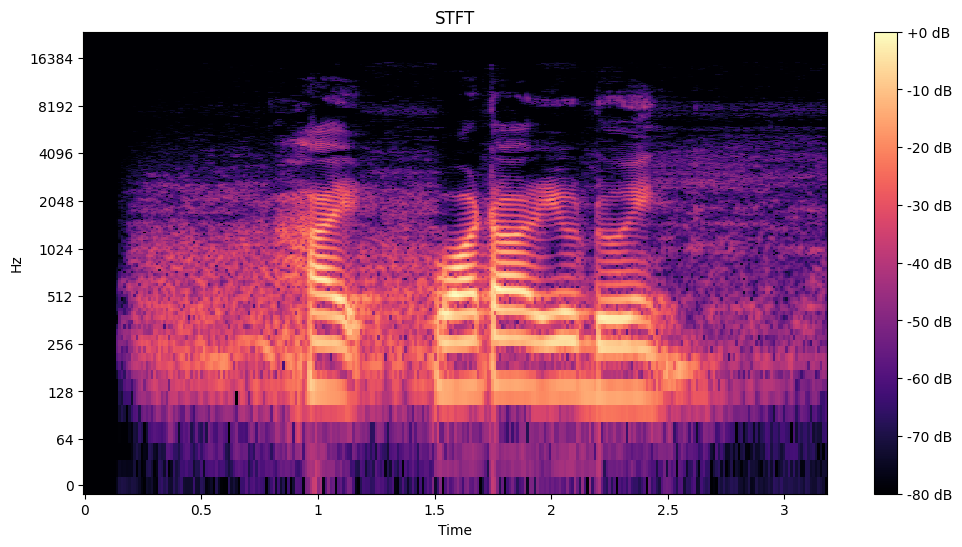

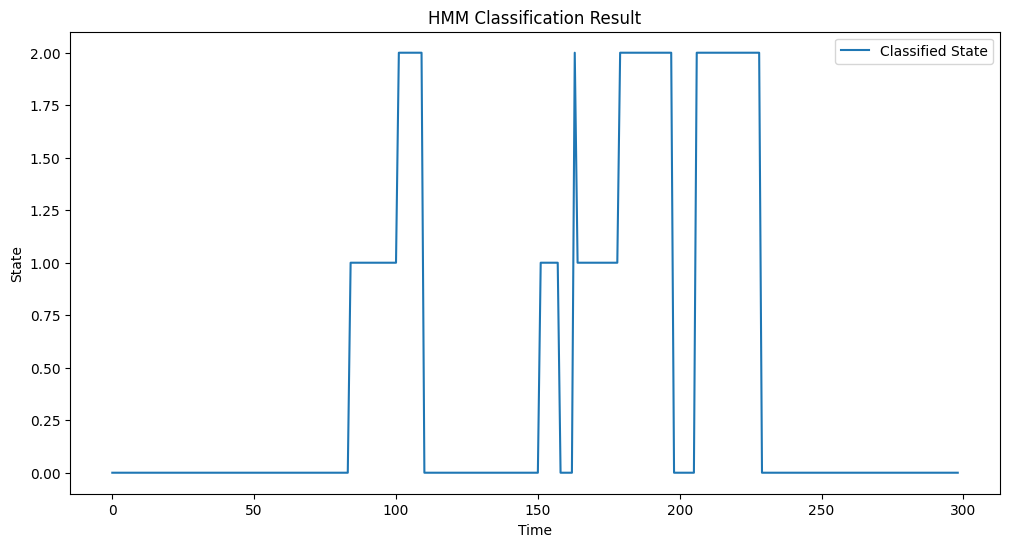

HMM Model Parameters:
Transition Matrix:
[[0.98067633 0.00966184 0.00966184]
 [0.02564103 0.92307692 0.05128205]
 [0.05769231 0.01923077 0.92307692]]
Means:
[[2.63909723e-02 4.71679848e-02 6.06254622e-02 ... 1.37108690e-04
  1.45283001e-04 1.28459124e-04]
 [1.51420320e-01 2.40443360e-01 2.64851950e-01 ... 1.51304236e-04
  1.46179831e-04 1.36894672e-04]
 [7.53006649e-02 1.63007763e-01 1.72011971e-01 ... 1.40848125e-04
  1.67662021e-04 1.80158213e-04]]
Covariances:
[[[1.22402282e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 4.61858821e-03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.27827914e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.80843183e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   4.80841475e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict the  using of the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path =r'/content/SPeech processing 2 audio.wav'
    y, sr = load_audio(audio_file_path)  ## Loading udio
    stft = stft_features(y, sr)   # Extract the STFT features
    plot_stft(stft, sr)  ## plotting thestft
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    labels = classify_signal(model, stft)     # Classify signal using trained HMM

    plt.figure(figsize=(12, 6))  # Plot the classification result
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    print("HMM Model Parameters:")    ## tHE MODEL PARAMETERS
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)

if __name__ == "__main__":
    main()
